In [1]:
import json
from bs4 import BeautifulSoup
import gzip
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fingerprintScripts = {}
with open('fingerprintScripts.txt', 'r') as file:
    for row in file:
        scriptName, _ = row.strip().split(',')
        fingerprintScripts[scriptName] = 0

In [3]:
pathlists = [Path('./datadir/sources/').glob('**/*.gz')]
for pathlist in pathlists:
    for path in pathlist:
        # because path is object not string
        filename = str(path)

        with gzip.open(filename , 'rb') as gzip_file:
            data = gzip_file.read()
            obj = json.loads(data.decode('utf-8'))

        soup = BeautifulSoup(obj['source'], 'html.parser')
        for script in soup.find_all('script'):
            script = str(script)
            for fingerprintScript in fingerprintScripts:
                scriptIdx = script.find(fingerprintScript)
                # print(script)
                # print(fingerprintScript)
                # print(scriptIdx)
                while scriptIdx != -1:
                    if (scriptIdx == 0 or not script[scriptIdx-1].isalpha()) and (scriptIdx == len(script)-len(fingerprintScript) or not script[scriptIdx+len(fingerprintScript)].isalpha()):
                        fingerprintScripts[fingerprintScript] += 1
                        break
                    scriptIdx = script.find(fingerprintScript, scriptIdx + 1)

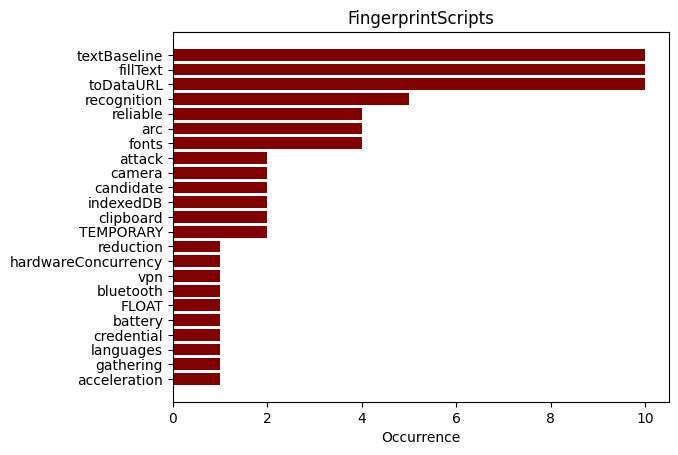

In [4]:
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data
stats = [(key, fingerprintScripts[key]) for key in fingerprintScripts if fingerprintScripts[key] > 0]
stats = sorted(stats, key=lambda x: -x[1])
people = [x[0] for x in stats]
y_pos = np.arange(len(people))
performance = [x[1] for x in stats]

ax.barh(y_pos, performance, align='center', color='maroon')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Occurrence')
ax.set_title('FingerprintScripts')

plt.savefig('fingerprint.png', bbox_inches="tight", dpi=300)
plt.show()